## **Preprocessing**

In this notebook, we will see how can we preprocess tweets (text data) for sentiment analysis. We will use **NLTK (Natural Language Toolkit)** package to perform a preprocessing pipeline for Twitter dataset.

### **Setup**

In order to perform sentiment analysis on tweets, we will be using the **NLTK** package, an open-source Python library for Natural Language Processing. It has modules for collecting, handling, and processing Twitter data.

We will use Twitter dataset that comes with NLTK. This dataset has been manually annotated and serves to establish baselines for models quickly.

Let's import the libraries we will be using.

In [ ]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import random

### **About this Twitter dataset**

This sample dataset from NLTK is separated into posititve and negative tweets. It contains 5000 positive and 5000 negative tweets. The exact match between the classes is intended to have a balanced dataset. This by no means reflect the real distribution of positive and negative classes in live Twitter streams.

Let's download the dataset from nltk.

In [ ]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

We will load the text files of positive negative tweets with the help of *strings()* method.

In [ ]:
# select the set of positive and negative tweets
pos_tweets = twitter_samples.strings('positive_tweets.json')
neg_tweets = twitter_samples.strings('negative_tweets.json')

Let's see the structure of the data.

In [ ]:
print('Number of positive tweets:', len(pos_tweets), '\n')
print('Number of negative tweets:', len(neg_tweets), '\n')
print('Data Structure type of pos_tweets: ', type(pos_tweets), '\n')
print('Data Structure type of neg_tweets:', type(neg_tweets), '\n')
print('Data type of each tweet:', type(neg_tweets[0]))

Number of positive tweets: 5000 

Number of negative tweets: 5000 

Data Structure type of pos_tweets:  <class 'list'> 

Data Structure type of neg_tweets: <class 'list'> 

Data type of each tweet: <class 'str'>


The data is stored in the form of **lists**, and invidual tweets are stored as **strings**.

Let's try to visualize the same information using a pie chart. For this purpose, we are going to use Matplotlib's pyplot library.

In [ ]:
# declare a figure
fig = plt.figure(figsize=(5,5))

<Figure size 360x360 with 0 Axes>

In [ ]:
# labels for two classes
labels = 'Positive', 'Negative'

In [ ]:
# size of each slice of piechart
sizes = [len(pos_tweets), len(neg_tweets)]

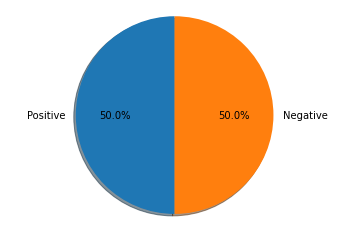

In [ ]:
# create and display a piechart
plt.pie(sizes,
        labels=labels,
        autopct='%1.1f%%',
        shadow=True,
        startangle=90)
plt.axis('equal')
plt.show()

### **Looking at raw texts**

Before going further into our analysis, we will print a couple of tweets from the dataset to see how they look.

In [ ]:
# print a random positive tweet in green color
print('\033[92m' + pos_tweets[random.randint(0, 5000)])

glad you &lt;3 it :) @Skythedeath


In [ ]:
# print a random negative tweet in red color
print('\033[91m' + neg_tweets[random.randint(0, 5000)])

ugh im so excited for made :(((((((((((((((((


One thing to notice about tweets dataset is the presence of emoticons and URLS. This info will help us in our preprocessing steps.

### **Preprocess raw text for Sentiment Analysis**

Data preprocessing is a critical step in any machine learning project. It includes cleaning and formatting the data before feeding into a machine learning algorithm. For NLP, the preprocessing steps are comprised of following tasks:

* Tokenization of strings
* Lowercasing all the tokens
* Stopwords and punctuations removal
* Stemming

In [ ]:
# apply these steps on a random tweet
tweet = pos_tweets[2277]
tweet

'My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i'

Few more required packages for these steps.

In [ ]:
# download the stopwords from nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re
import string

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

### <font color= #16B0F5>(1) Remove hyperlinks, Twitter marks and styles</font>

Since this is a Twitter dataset, we need to remove some substrings commonly used on the platform like hashtag, retweet marks, and hyperlinks. We will use the *re* package to perform regular expression operations on our tweet. 

We can define our search pattern and use the *sub()* method to remove matches by substituting with an empty character ('').

In [ ]:
print('\033[92m' + tweet)


My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [ ]:
# remove old style retweet text "RT"
tweet2 = re.sub(r'^RT[\s]', '', tweet)
print('\033[92m' + tweet2)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [ ]:
# remove hyperlinks
tweet2 = re.sub(r'https:?:\/\/.*[\r\n*]*', '', tweet2)
print('\033[92m' + tweet2)

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


In [ ]:
# remove hashtag sign
tweet2 = re.sub(r'#', '', tweet2)
print('\033[92m' + tweet2)

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


### <font color= #16B0F5>(2) String Tokenization & Lowercase conversion</font>

String Tokenization simply means to split the strings into individual words without blanks or tabs.

In this same step we will also convert each token (word) into lower case. *tokenize()* module in NLTK has in-built functionality for that.

In [ ]:
print('\033[92m' + tweet2)

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


In [ ]:
# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False,
                           strip_handles=True,
                           reduce_len=True)

In [ ]:
# tokenize tweets
tweet_tokens = tokenizer.tokenize(tweet2)
tweet_tokens

['my',
 'beautiful',
 'sunflowers',
 'on',
 'a',
 'sunny',
 'friday',
 'morning',
 'off',
 ':)',
 'sunflowers',
 'favourites',
 'happy',
 'friday',
 'off',
 '…']

### <font color= #16B0F5>(3) Remove StopWords and Punctuations</font>

Next we will remove stop words and punctuations. Stop words are words that do not add significant meaning to the text.

In [ ]:
# import the English stop words list from NLTK
stopwords_eng = stopwords.words('english')

print('Stop words:\n')
print(stopwords_eng)

print('\nPunctuations:\n')
print(string.punctuation)

Stop words:

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 's

In the stop words list above (provided with NLTK) may contains some words that could be important in some contexts. These could be words like i, not, between, because, won, against, etc. We might need to customize the stop words list for some applications.

For now, we will use the entire list.


For the punctuation, we saw certain groupings like ':)' and '...'. Ideally these should be retained when dealing with tweets because they are used to express emotions. In other contexts, like medical analysis, these should also be removed.

Let's now clean our tokenized tweet.

In [ ]:
print('\033[92m')
print(tweet_tokens)


['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


In [ ]:
tweets_clean = []

for word in tweet_tokens:
  if (word not in stopwords_eng and word not in string.punctuation):
    tweets_clean.append(word)

print('Stopwords and Punctuations removed successfully!\n')
print('tweets_clean:\n', tweets_clean)

Stopwords and Punctuations removed successfully!

tweets_clean:
 ['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


### <font color= #16B0F5>(4) Stemming</font>

**Stemming** is the process of converting a word into its most general form, or stem. This helps in reducing the size of our vocabilary.

For example, consider the following words:

* **learn**
* **learn**ing
* **learn**ed
* **learn**t

All these words are stemmed from its common root **learn**. However, in some cases, the stemming process produces words that are not correct spellings of the root word.

For example, **happi** and **sunni**. That's because it chooses the most common stem for related words. 

We can look at the below set of words that comprises the different forms of happy:

* **happ**y
* **happi**ness
* **happi**er

We can see that the prefix **happi** is more commonly used. We cannot choose **happ** because it is the stem of unrelated words like **happen**.

NLTK has different modules for stemming. We will be using most widely used the *PorterStemmer* module which uses *Porter Stemming Algorithm*.

In [ ]:
print('\033[92m')
print(tweets_clean)


['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


In [ ]:
# instantiate stemming class
stemmer = PorterStemmer()

# create an empty list to store the stems
tweets_stem = []

In [ ]:
for word in tweets_clean:
  stem_word = stemmer.stem(word)
  tweets_stem.append(stem_word)

In [ ]:
print('stemmed words:\n', tweets_stem)

stemmed words:
 ['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


This completes our preprocessing for the tweet text, and we can now feed this set of words into the next stage of our machine learning project.

### **Using process_tweet() function from utils.py**

As we already saw earlier, preprocessing consists of multiple steps before we arrive at the final list of words. 

In order to perform these steps, we can directly use the function *process_tweet*(tweet) we have created in *utils.py* file. We will obtain the same results as earlier by just calling the function *process_tweet()*. Let's try that.

In [ ]:
from utils import process_tweet

In [ ]:
# choose the same tweet
tweet = pos_tweets[2277]

print('\033[92m')
print(tweet)

# call the imported function
tweets_stem = process_tweet(tweet)

print('preprocessed tweet:')
print(tweets_stem)